In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

**Tarefa 1: Identificação de Dados**

Fonte de dados utilizada Para esta análise:

[Portal Brasileiro de Dados Abertos do Banco Central](https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries)

[Sobre o Portal do Banco Central](https://dadosabertos.bcb.gov.br/pages/sobre-o-portal)

Séries de dados utilizadas: 
* Dívida Externa Bruta = (3684) - Fonte BCB-DSTAT
* Dívida Externa Líquida = (3685) - Fonte BCB-DSTAT
* PIB mensal - Valores correntes = (4380) - Fonte BCB-Depec

Premissas:
* **Dívida Externa Bruta:** Soma da dívida externa bruta do setor público não-financeiro e do Banco Central.

* **Dívida Externa Líquida:** Dívida Externa Bruta menos as aplicações em moeda estrangeira. Banco Central está incluído, as reservas internacionais* do Banco Central também são consideradas como aplicações e, portanto, deduzidas do total.
[*Jupiter Notebook para Análise das Reservas Internacionais - Brasil](https://github.com/MonteiroOscar98/Finance/blob/main/Reservas_Internacionais_Brasil.ipynb)

* **Produto interno bruto:** O produto interno bruto representa a soma de todos os bens e serviços finais produzidos. O PIB é um dos indicadores mais utilizados na macroeconomia com o objetivo de quantificar a atividade econômica de uma região.


**Tarefa 2: Coleta de Dados**

Definindo Constantes

Como a API usa códigos, criamos um mapeamento entre os códigos e nomes significativos para usar ao analisar e armazenar os dados.

**Buscar dados por meio de chamadas de API**

As funções a seguir foram escritas para fazer uma chamada de API por recurso e buscar os dados. Cada uma dessas funções executa as seguintes tarefas:

*consulta_bc( )*: Função que realizará a consulta via API do BANCO CENTRAL DO BRASIL.

*grafico_periodo_gov( )*: Função que plota os gráficos referentes aos governos específicados por df, inicio, fim (governos).

In [2]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

def grafico_periodo_gov(df, inicio, fim):
  periodo = df[(df.index >= inicio) & (df.index <= fim)]  
  periodo['divida'].plot()

Definição dos datasets e chamada das consultas através dos códigos BCB, que retornará os Datasets específicados

In [3]:
divida_externa_bruta = consulta_bc(3684)
divida_externa_liquida = consulta_bc(3685)
pib_dolar = consulta_bc(4385)
reservas_internacionais = consulta_bc(13621)

**Tarefa 3: Pré-processamento de dados**

Os dados acima foram coletados e atribuídos a datasets individuais por meio de várias chamadas de API.

Comparando a proporção da dívida externa bruta e líquida com o PIB do período.

In [4]:

div_bruta_perc_pib = (((divida_externa_bruta * 100) / pib_dolar))
div_bruta_perc_pib.dropna(inplace=True)
div_liquida_perc_pib = (((divida_externa_liquida * 100) / pib_dolar))
div_liquida_perc_pib.dropna(inplace=True)

Filtro das dívidas líquidas e brutas, separadas em df distintos, negativas e positivas em US$.

In [5]:
divida_externa_liquidaNeg = divida_externa_liquida[(divida_externa_liquida <= 0).all(axis=1)]
divida_externa_liquidaPos = divida_externa_liquida[(divida_externa_liquida >= 0).all(axis=1)]

divida_liquida_perc_pibNeg = div_liquida_perc_pib[(div_liquida_perc_pib <= 0).all(axis=1)]
divida_liquida_perc_pibPos = div_liquida_perc_pib[(div_liquida_perc_pib >= 0).all(axis=1)]

Cópia dos datasets 

Criação de um dataset específico para análise dos governos

In [6]:
divida_externa_liquida_gov = divida_externa_liquida
divida_externa_liquida_gov.columns =['divida']

divida_externa_bruta_gov = divida_externa_bruta
divida_externa_bruta_gov.columns =['divida']

**Alteração de tipos**

Podemos observar que a coluna 'Data' é um valor numérico, e os valores são separados por " , " e não " . ".

Alteramos os formatos para datetime e float.

Retornamos o dataframes atualizados convertidos para que os valores sejam representados corretamente.

In [7]:
divida_externa_liquida_gov.index = pd.to_datetime(divida_externa_liquida_gov.index, format='%d%m%Y')
divida_externa_liquida_gov = divida_externa_liquida_gov.replace(',','.', regex=True).astype(float)
divida_externa_liquida_gov = divida_externa_liquida_gov/1000

divida_externa_bruta_gov.index = pd.to_datetime(divida_externa_bruta_gov.index, format='%d%m%Y')
divida_externa_bruta_gov = divida_externa_bruta_gov.replace(',','.', regex=True).astype(float)
divida_externa_bruta_gov = divida_externa_bruta_gov/1000

In [8]:
# Definição das datas de inicio para Plotagens
data_inicio = '1987-03-31'
data_inicio2 = '2000-01-01'

**Tarefa 4: Análise e representação dos conjuntos de dados processados**

Como temos todos os conjuntos de dados pré-processados, podemos criar visualizações a partir deles para identificar padrões. 
Usei as bibliotecas matplotlib e seaborn para analisar os dados.

**Analisando a Evolução da Dívida Externa Brasileira Desde 2000**


Uma vez que temos dados desde 1987, podemos restringir um período que faça sentido para a análise.

Plotamos os datasets *divida_externa_bruta, divida_externa_liquidaPos, divida_externa_liquidaNeg* para que tenhamos ambas evoluções no mesmo plot

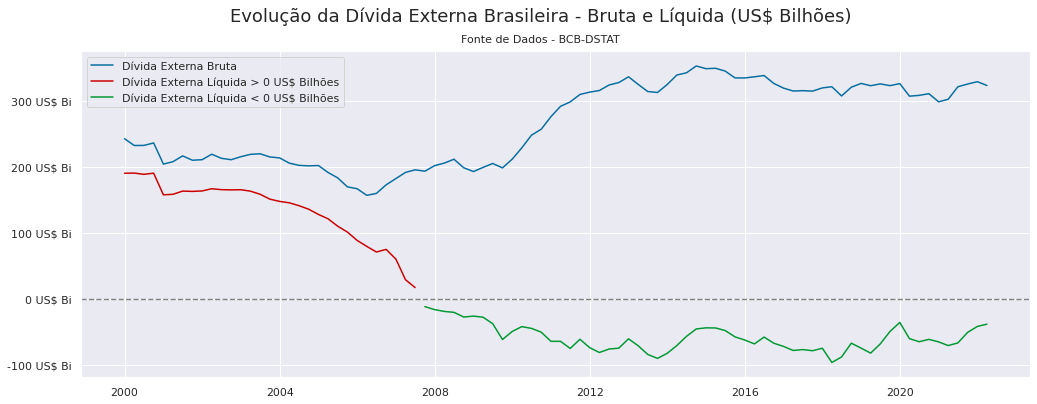

In [13]:
matplotlib.rcParams['figure.figsize'] = (17,6)
fig, (ax1) = plt.subplots(1, sharex=True)
#Títulos do gráfico
plt.text(x=0.5, y=0.95, s= "Evolução da Dívida Externa Brasileira - Bruta e Líquida (US$ Bilhões)", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.90, s= "Fonte de Dados - BCB-DSTAT", fontsize=11, ha="center", transform=fig.transFigure)
#Plotagem das Séries
ax1.plot(divida_externa_bruta[divida_externa_bruta.index >= data_inicio2], color='#076FA1')
ax1.plot(divida_externa_liquidaPos[divida_externa_liquidaPos.index >= data_inicio2], color='#cc0000')
ax1.plot(divida_externa_liquidaNeg[divida_externa_liquidaNeg.index >= data_inicio2], color='#009933')
#Legenda dos Rótulos
ax1.legend(['Dívida Externa Bruta','Dívida Externa Líquida > 0 US$ Bilhões','Dívida Externa Líquida < 0 US$ Bilhões'])
#Escalando os valores e transformando os eixos y em %
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g} US$ Bi'.format(x/scale_y))
ax1.yaxis.set_major_formatter(ticks_y)
#Imprimindo uma linha em y=0.0
plt.axhline(y=0.0, color='grey', linewidth=1.4, linestyle='--')
plt.show()

**Analisando a Representação da Dívida Externa Brasileira em relação ao Produto Interno Bruto(PIB)**

Assim como no gráfico anterior plotamos os mesmos dataframes, porém utilizando as cópias convertidas e comparadas com o PIB para que os dataframes já estivessem em percentual.

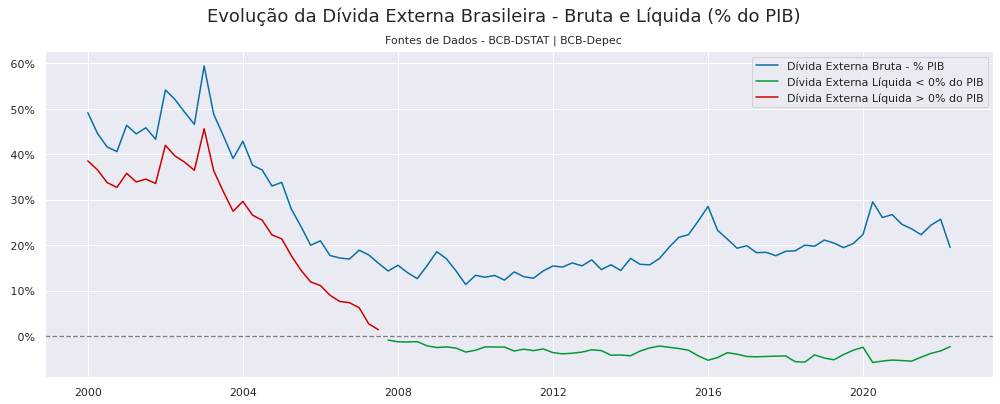

In [14]:
matplotlib.rcParams['figure.figsize'] = (17,6)
fig, (ax1) = plt.subplots(1, sharex=True)
#Títulos do gráfico
plt.text(x=0.5, y=0.95, s= "Evolução da Dívida Externa Brasileira - Bruta e Líquida (% do PIB)", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.90, s= "Fontes de Dados - BCB-DSTAT | BCB-Depec", fontsize=11, ha="center", transform=fig.transFigure)
#Plotagem das Séries
ax1.plot(div_bruta_perc_pib[div_bruta_perc_pib.index >= data_inicio2], color='#076FA1')
ax1.plot(divida_liquida_perc_pibNeg[divida_liquida_perc_pibNeg.index >= data_inicio2], color='#009933')
ax1.plot(divida_liquida_perc_pibPos[divida_liquida_perc_pibPos.index >= data_inicio2], color='#cc0000')
#Legenda dos Rótulos
ax1.legend(['Dívida Externa Bruta - % PIB','Dívida Externa Líquida < 0% do PIB','Dívida Externa Líquida > 0% do PIB'])
#Escalando os valores e formatando o eixo y em %
scale_y = 1e1
ticks_y = ticker.FuncFormatter(lambda x, pos: ' {0:g}%'.format(x/scale_y))
ax1.yaxis.set_major_formatter(ticks_y)
#Imprimindo uma linha em y=0.0
plt.axhline(y=0.0, color='grey', linewidth=1.3, linestyle='--')
plt.show()

**Analisando a Evolução da Dívida Externa Bruta Brasileira Por Presidente da República**

Plotamos os datasets *divida_externa_bruta_gov* atribuídos na chamada da função *grafico_periodo_gov( )* junto aos períodos governamentais.

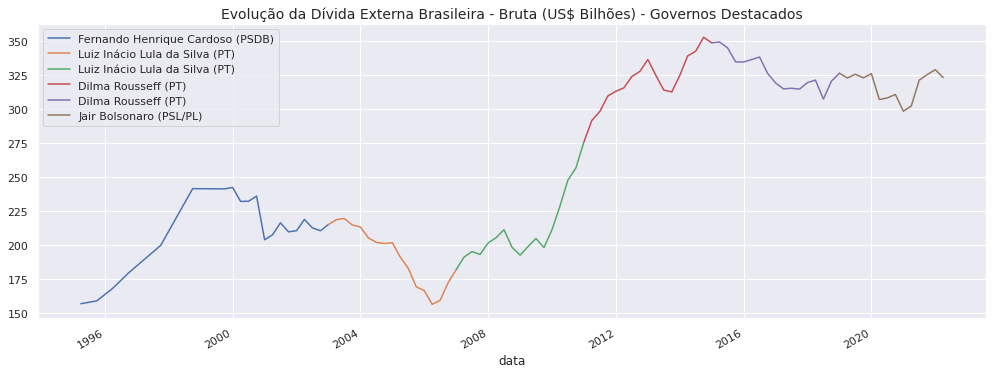

In [15]:
plt.rcParams['figure.figsize'] = (17, 6)
plt.title('Evolução da Dívida Externa Brasileira - Bruta (US$ Bilhões) - Governos Destacados', fontsize=14)
grafico_periodo_gov(divida_externa_bruta_gov, '1995-01-01', '2003-01-01')
grafico_periodo_gov(divida_externa_bruta_gov, '2003-01-01', '2007-01-01')
grafico_periodo_gov(divida_externa_bruta_gov, '2007-01-01', '2011-01-01')
grafico_periodo_gov(divida_externa_bruta_gov, '2011-01-01', '2015-01-01')
grafico_periodo_gov(divida_externa_bruta_gov, '2015-01-01', '2019-01-01')
grafico_periodo_gov(divida_externa_bruta_gov, '2019-01-01', '2022-11-24')
#Legenda dos períodos
plt.legend(['Fernando Henrique Cardoso (PSDB)','Luiz Inácio Lula da Silva (PT)','Luiz Inácio Lula da Silva (PT)','Dilma Rousseff (PT)','Dilma Rousseff (PT)','Jair Bolsonaro (PSL/PL)'])
plt.show()

**Analisando a Evolução da Dívida Externa Líquida Brasileira Por Presidente da República**

Plotamos os datasets *divida_externa_liquida_gov* atribuídos na chamada da função *grafico_periodo_gov( )* junto aos períodos governamentais.

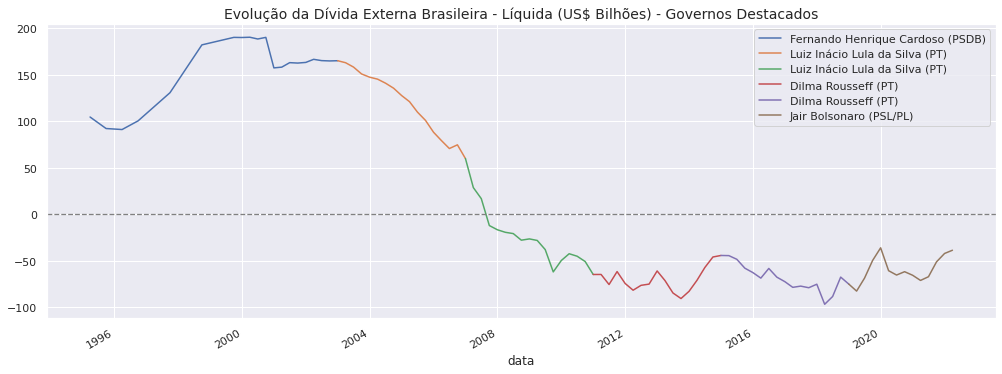

In [16]:
plt.rcParams['figure.figsize'] = (17, 6)
plt.title('Evolução da Dívida Externa Brasileira - Líquida (US$ Bilhões) - Governos Destacados', fontsize=14)
grafico_periodo_gov(divida_externa_liquida_gov, '1995-01-01', '2003-01-01')
grafico_periodo_gov(divida_externa_liquida_gov, '2003-01-01', '2007-01-01')
grafico_periodo_gov(divida_externa_liquida_gov, '2007-01-01', '2011-01-01')
grafico_periodo_gov(divida_externa_liquida_gov, '2011-01-01', '2015-01-01')
grafico_periodo_gov(divida_externa_liquida_gov, '2015-01-01', '2019-01-01')
grafico_periodo_gov(divida_externa_liquida_gov, '2019-01-01', '2022-11-24')
#Legenda dos períodos
plt.legend(['Fernando Henrique Cardoso (PSDB)','Luiz Inácio Lula da Silva (PT)','Luiz Inácio Lula da Silva (PT)','Dilma Rousseff (PT)','Dilma Rousseff (PT)','Jair Bolsonaro (PSL/PL)'])
#Imprimindo uma linha em y=0.0
plt.axhline(y=0.0, color='grey', linewidth=1.3, linestyle='--')
plt.show()